In [1]:
import os
import sys
import json
import pandas as pd
from IPython.display import Image

In [2]:
config_path = os.path.join(os.path.abspath(os.pardir), "config/evaluate_segment.json")

In [3]:
with open(config_path) as param:
    all_info = json.load(param)
    saving_result_path = all_info["saving_result_path"]
param.close()

In [4]:
os.chdir("..")
cm_person = saving_result_path["cm_path_person"]
cm_segment = saving_result_path["cm_path_segment"]
roc_person = saving_result_path["ROC_path_person"]
roc_segment = saving_result_path["ROC_path_segment"]
featText_person = saving_result_path["feature_text"]
ReadmeText_person = saving_result_path["Readme_text"]
classification_result_person = saving_result_path["classification_result_person"]
classification_result_segment = saving_result_path["classification_result_segment"]

### Overview of the inference

In [5]:
with open(ReadmeText_person) as f:
    content = f.readlines()
f.close()
for i in content:
    print(i)

AutoML: <class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'> 

best training accuracy at segment-level is 0.6288258208124652 

best testing accuracy at segment-level is 0.683111954459203 

best testing accuracy at person level is 0.75 

CT training data: 833 

AD training data: 964 

CT testing data: 294 

AD testing data: 233 



### Selected feature names

In [6]:
with open(featText_person) as f:
    content = f.readlines()
f.close()
for i in content:
    print(i)

energy_mean

energy_var

energy_skewness

energy_kurtosis

energy_vel_mean

energy_vel_var

energy_vel_skewness

energy_vel_kurtosis

energy_accel_mean

energy_accel_var

energy_accel_skewness

energy_accel_kurtosis

mfcc1_mean

mfcc1_var

mfcc1_skewness

mfcc1_kurtosis

mfcc1_vel_mean

mfcc1_vel_var

mfcc1_vel_skewness

mfcc1_vel_kurtosis

mfcc1_accel_mean

mfcc1_accel_var

mfcc1_accel_skewness

mfcc1_accel_kurtosis

mfcc2_mean

mfcc2_var

mfcc2_skewness

mfcc2_kurtosis

mfcc2_vel_mean

mfcc2_vel_var

mfcc2_vel_skewness

mfcc2_vel_kurtosis

mfcc2_accel_mean

mfcc2_accel_var

mfcc2_accel_skewness

mfcc2_accel_kurtosis

mfcc3_mean

mfcc3_var

mfcc3_skewness

mfcc3_kurtosis

mfcc3_vel_mean

mfcc3_vel_var

mfcc3_vel_skewness

mfcc3_vel_kurtosis

mfcc3_accel_mean

mfcc3_accel_var

mfcc3_accel_skewness

mfcc3_accel_kurtosis

mfcc4_mean

mfcc4_var

mfcc4_skewness

mfcc4_kurtosis

mfcc4_vel_mean

mfcc4_vel_var

mfcc4_vel_skewness

mfcc4_vel_kurtosis

mfcc4_accel_mean

mfcc4_accel_var

mfcc4_a

### Confusion Matrix

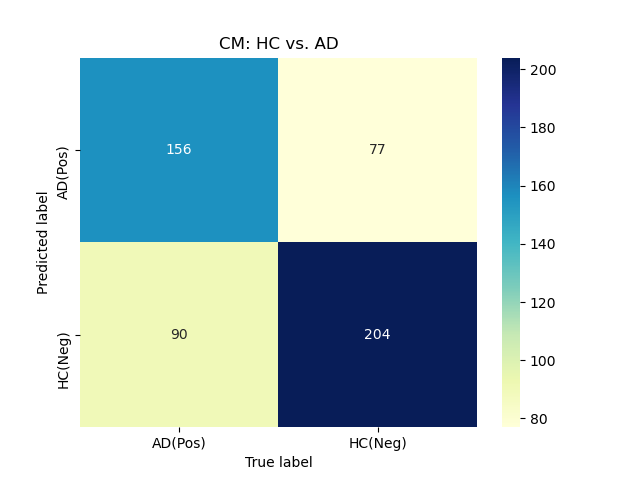

In [7]:
#classification on segment-level.
Image(filename=cm_segment)


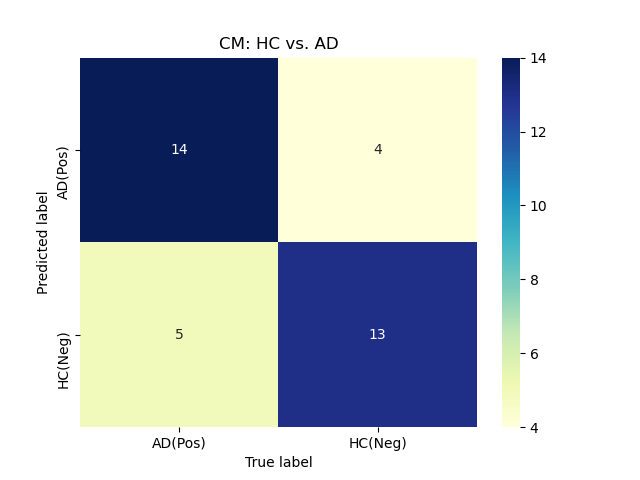

In [8]:
#classification on person-level.
Image(filename=cm_person)

### ROC Curve

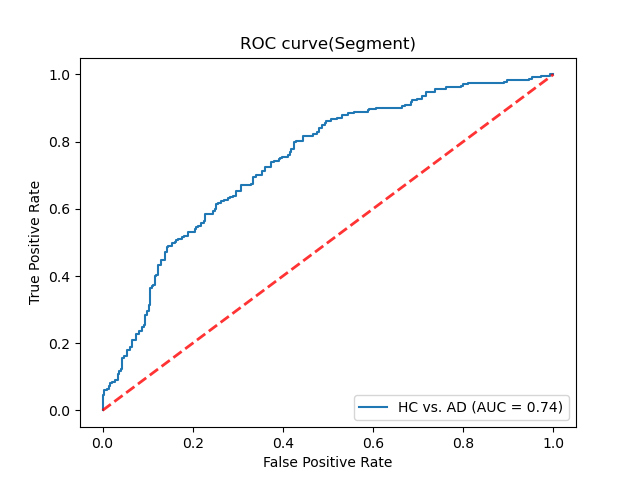

In [9]:
#ROC on segment-level
Image(filename=roc_segment)


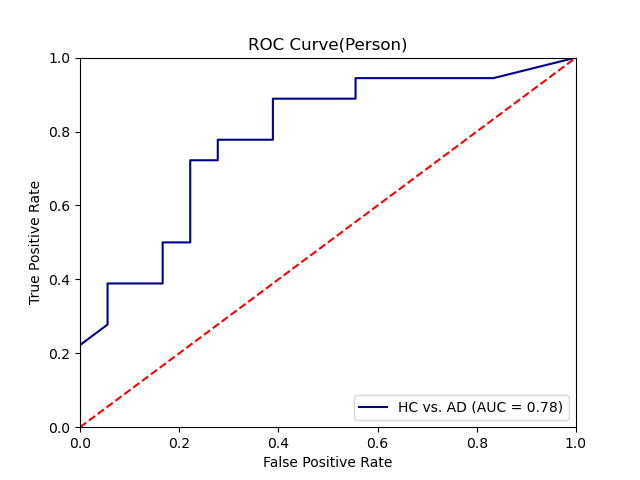

In [10]:
#ROC on person-level
Image(filename=roc_person)

### Result CSV

In [11]:
#1 = AD, 0 = Control
#result on segment-level
result_segment = pd.read_csv(classification_result_segment)
result_segment

,Name,label,prediction,probability,is_correct
0,128-3_0,0,0,"[0.506, 0.494]",True
1,128-3_1,0,0,"[0.546, 0.454]",True
2,128-3_10,0,0,"[0.707, 0.293]",True
3,128-3_11,0,0,"[0.775, 0.225]",True
4,128-3_12,0,0,"[0.758, 0.242]",True
...,...,...,...,...,...
522,325-1_0,1,1,"[0.48, 0.52]",True
523,325-1_1,1,1,"[0.245, 0.755]",True
524,325-1_2,1,1,"[0.376, 0.624]",True
525,325-1_3,1,1,"[0.43, 0.57]",True


In [12]:
#1 = AD, 0 = Control
#result on segment-level
result_person = pd.read_csv(classification_result_person)
result_person

,code,records,num_ct,num_ad,prediction,label,is_correct
0,Control_128-3,38,37,1,0,0,True
1,Control_132-1,12,2,10,1,0,False
2,Control_137-3,13,4,9,1,0,False
3,Control_138-3,13,8,5,0,0,True
4,Control_139-3,4,4,0,0,0,True
5,Control_140-3,7,7,0,0,0,True
6,Control_141-3,12,10,2,0,0,True
7,Control_145-3,17,15,2,0,0,True
8,Control_150-2,15,7,8,1,0,False
9,Control_155-3,13,5,8,1,0,False
